# Analiza danych statystycznych
## Lista 1

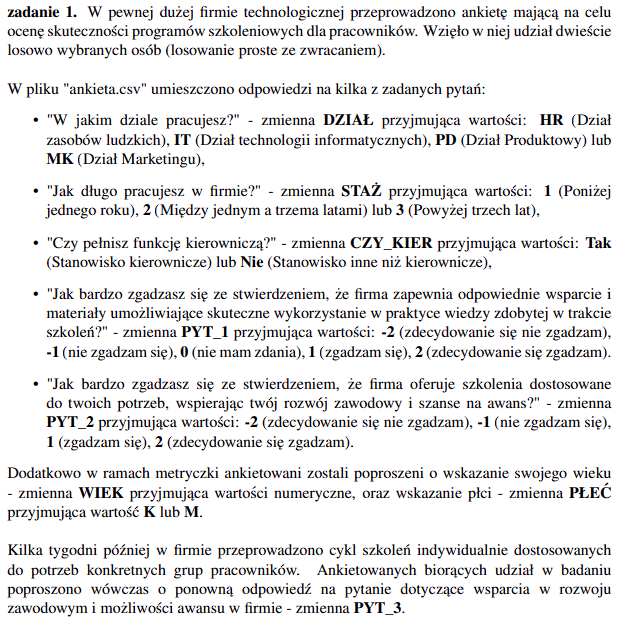

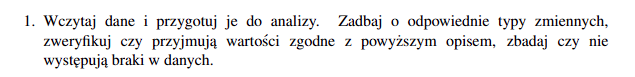

In [1]:
import pandas as pd

df = pd.read_csv('ankieta.csv', encoding='Latin2', sep=";")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DZIAŁ     200 non-null    object
 1   STAŻ      200 non-null    int64 
 2   CZY_KIER  200 non-null    object
 3   PYT_1     200 non-null    int64 
 4   PYT_2     200 non-null    int64 
 5   PYT_3     200 non-null    int64 
 6   PŁEĆ      200 non-null    object
 7   WIEK      200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB


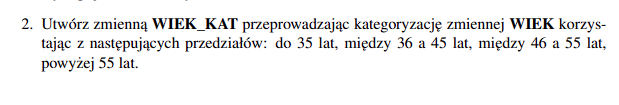

In [5]:
df.loc[df['WIEK'] <= 35, 'WIEK_KAT'] = '< 36'
df.loc[(df['WIEK'] >= 36) & (df['WIEK'] <= 45), 'WIEK_KAT'] = 'od 36 do 45'
df.loc[(df['WIEK'] >= 46) & (df['WIEK'] <= 55), 'WIEK_KAT'] = 'od 46 do 55'
df.loc[df['WIEK'] > 55, 'WIEK_KAT'] = '55 <'

In [6]:
df

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT
0,IT,2,Nie,1,-2,1,M,64,55 <
1,IT,2,Nie,0,-2,-2,M,67,55 <
2,IT,2,Nie,1,2,2,M,65,55 <
3,IT,2,Nie,-1,-2,-2,K,68,55 <
4,IT,3,Tak,1,2,-1,K,65,55 <
...,...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42,od 36 do 45
196,HR,2,Nie,1,-1,-1,K,35,< 36
197,HR,2,Nie,-1,-2,-2,K,39,od 36 do 45
198,HR,2,Nie,1,2,1,K,48,od 46 do 55


In [7]:
table_dzial = df['DZIAŁ'].value_counts()
print(table_dzial)


DZIAŁ
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64


In [8]:
table_staz = df['STAŻ'].value_counts()
print(table_staz)


STAŻ
2    140
1     41
3     19
Name: count, dtype: int64


In [9]:
table_czykier = df['CZY_KIER'].value_counts()
print(table_czykier)


CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64


In [10]:
table_plec = df['PŁEĆ'].value_counts()
print(table_plec)


PŁEĆ
M    129
K     71
Name: count, dtype: int64


In [11]:
table_wiekkat = df['WIEK_KAT'].value_counts()
print(table_wiekkat)


WIEK_KAT
od 36 do 45    104
od 46 do 55     45
< 36            26
55 <            25
Name: count, dtype: int64


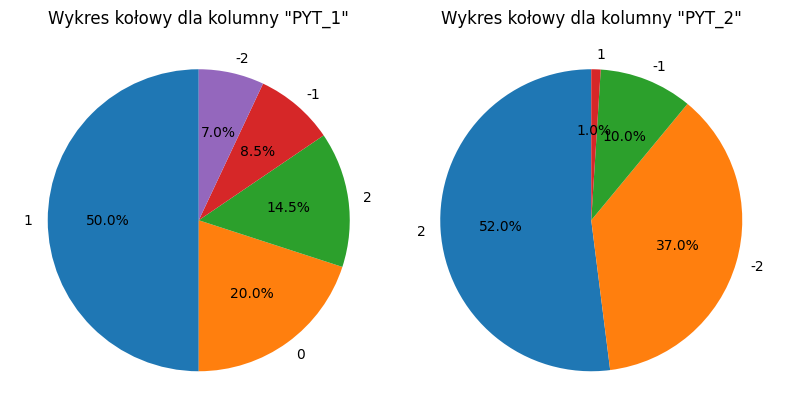

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

table_pyt1 = df['PYT_1'].value_counts()
table_pyt2 = df['PYT_2'].value_counts()

plt.subplot(1,2,1)
plt.pie(table_pyt1, labels=table_pyt1.index, autopct='%1.1f%%', startangle=90)
plt.title('Wykres kołowy dla kolumny "PYT_1"')

plt.subplot(1,2,2)
plt.pie(table_pyt2, labels=table_pyt2.index, autopct='%1.1f%%', startangle=90)
plt.title('Wykres kołowy dla kolumny "PYT_2"')

plt.tight_layout()
plt.show()



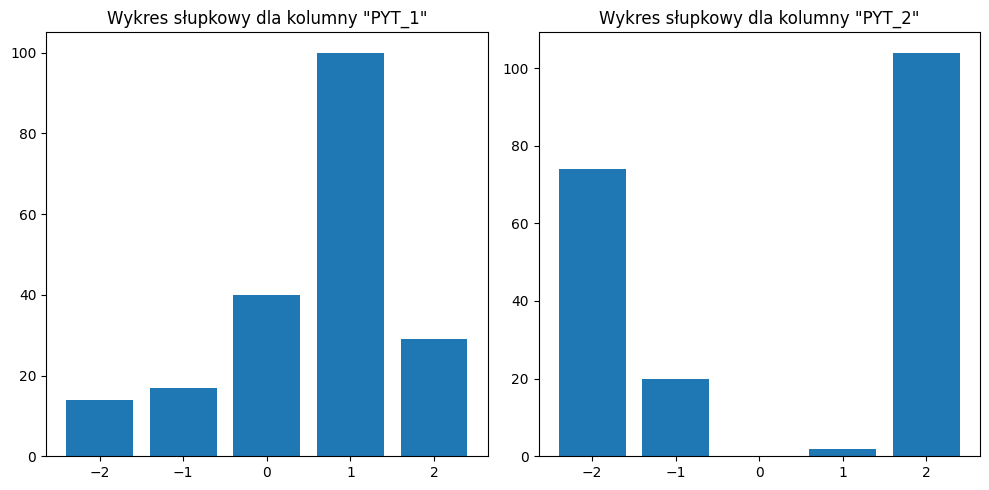

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.bar(table_pyt1.index, table_pyt1)
plt.title('Wykres słupkowy dla kolumny "PYT_1"')

plt.subplot(1,2,2)
plt.bar(table_pyt2.index, table_pyt2)
plt.title('Wykres słupkowy dla kolumny "PYT_2"')

plt.tight_layout()
plt.show()

In [15]:
crosstab1 = pd.crosstab(df['PYT_1'], 
                            df['DZIAŁ'],  
                               margins = False) 
crosstab1

DZIAŁ,HR,IT,MK,PD
PYT_1,,,,
-2,2,0,3,9
-1,2,2,3,10
0,5,4,14,17
1,19,15,15,51
2,3,5,10,11


In [16]:
crosstab2 = pd.crosstab(df['PYT_1'], 
                            df['STAŻ'],  
                               margins = False) 
crosstab2

STAŻ,1,2,3
PYT_1,,,
-2,5,5,4
-1,6,10,1
0,8,26,6
1,19,75,6
2,3,24,2


In [17]:
crosstab3 = pd.crosstab(df['PYT_1'], 
                            df['CZY_KIER'],  
                               margins = False) 
crosstab3 

CZY_KIER,Nie,Tak
PYT_1,,
-2,10,4
-1,14,3
0,34,6
1,88,12
2,27,2


In [18]:
crosstab4 = pd.crosstab(df['PYT_1'], 
                            df['PŁEĆ'],  
                               margins = False) 
crosstab4

PŁEĆ,K,M
PYT_1,,
-2,3,11
-1,7,10
0,14,26
1,36,64
2,11,18


In [19]:
crosstab5 = pd.crosstab(df['PYT_1'], 
                            df['WIEK_KAT'],  
                               margins = False) 
crosstab5

WIEK_KAT,55 <,< 36,od 36 do 45,od 46 do 55
PYT_1,,,,
-2,0,1,11,2
-1,3,6,7,1
0,8,3,24,5
1,12,13,50,25
2,2,3,12,12


In [20]:
crosstab6 = pd.crosstab(df['PYT_1'], 
                            df['PYT_2'],  
                               margins = False) 
crosstab6

PYT_2,-2,-1,1,2
PYT_1,,,,
-2,13,0,1,0
-1,16,0,0,1
0,39,0,1,0
1,3,17,0,80
2,3,3,0,23


In [21]:
df.loc[df['PYT_2'] <= -1, 'CZY_ZADOW'] = 'NIE'
df.loc[df['PYT_2'] >= 1, 'CZY_ZADOW'] = 'TAK'

In [22]:
df

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
0,IT,2,Nie,1,-2,1,M,64,55 <,NIE
1,IT,2,Nie,0,-2,-2,M,67,55 <,NIE
2,IT,2,Nie,1,2,2,M,65,55 <,TAK
3,IT,2,Nie,-1,-2,-2,K,68,55 <,NIE
4,IT,3,Tak,1,2,-1,K,65,55 <,TAK
...,...,...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42,od 36 do 45,TAK
196,HR,2,Nie,1,-1,-1,K,35,< 36,NIE
197,HR,2,Nie,-1,-2,-2,K,39,od 36 do 45,NIE
198,HR,2,Nie,1,2,1,K,48,od 46 do 55,TAK


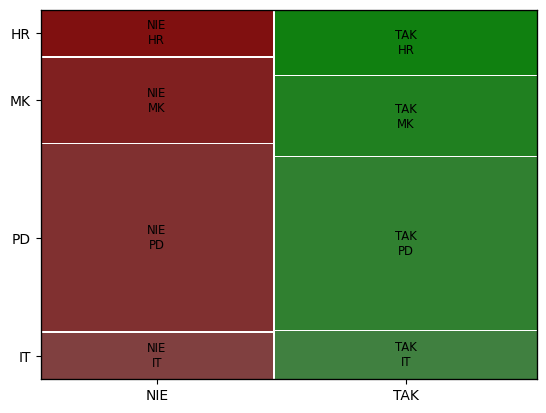

In [23]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['CZY_ZADOW', 'DZIAŁ'])
plt.show()

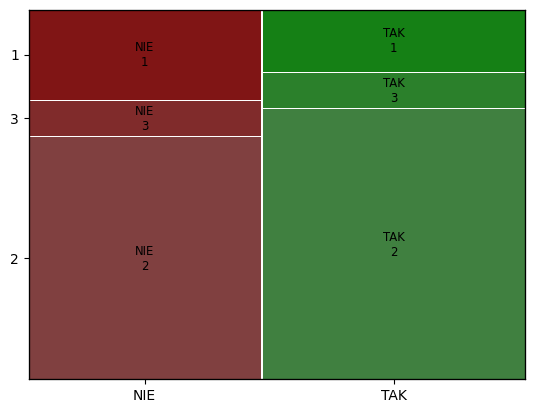

In [24]:
mosaic(df, ['CZY_ZADOW', 'STAŻ'])
plt.show()

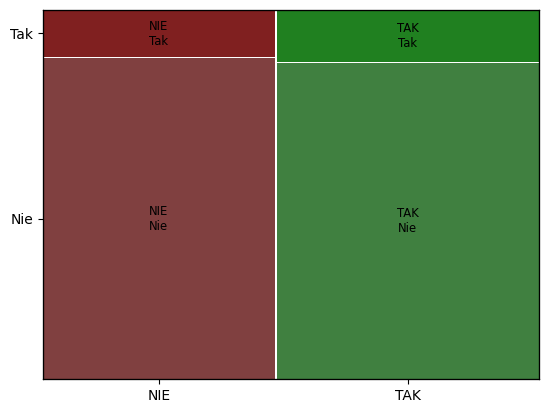

In [25]:
mosaic(df, ['CZY_ZADOW', 'CZY_KIER'])
plt.show()

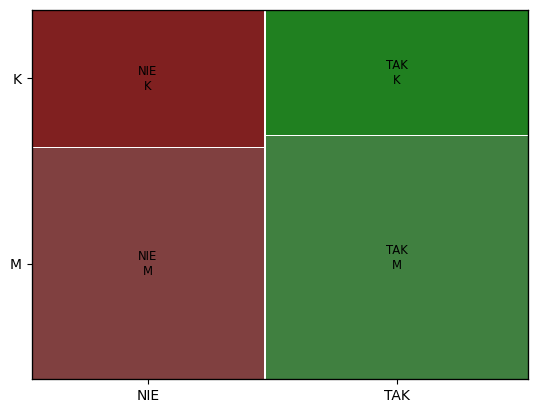

In [26]:
mosaic(df, ['CZY_ZADOW', 'PŁEĆ'])
plt.show()

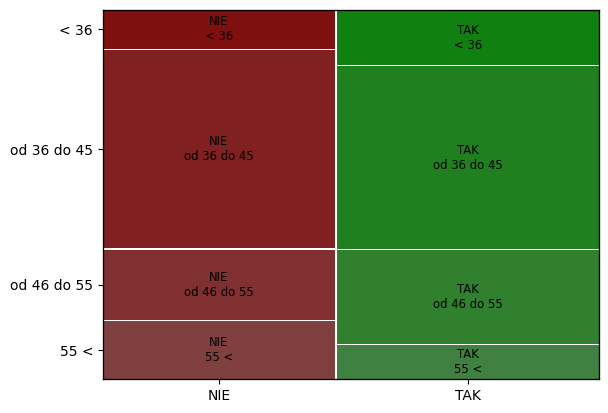

In [27]:
mosaic(df, ['CZY_ZADOW', 'WIEK_KAT'])
plt.show()

# Część II

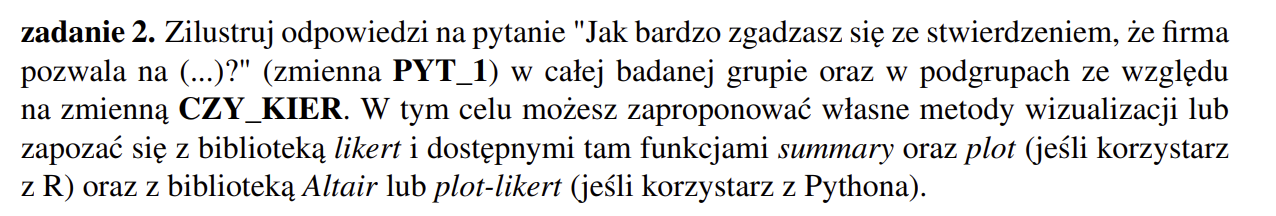

In [28]:
pd.DataFrame(table_pyt1).sort_values("PYT_1").transpose()

PYT_1,-2,-1,0,1,2
count,14,17,40,100,29


In [29]:

from plot_likert import plot_likert
df_pivot = df.pivot_table(index="CZY_KIER", columns="PYT_1", aggfunc="size", fill_value=0)

In [30]:
df_pivot

PYT_1,-2,-1,0,1,2
CZY_KIER,,,,,
Nie,10,14,34,88,27
Tak,4,3,6,12,2


c:\Users\rafal\AppData\Local\Programs\Python\Python313\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\rafal\AppData\Local\Programs\Python\Python313\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


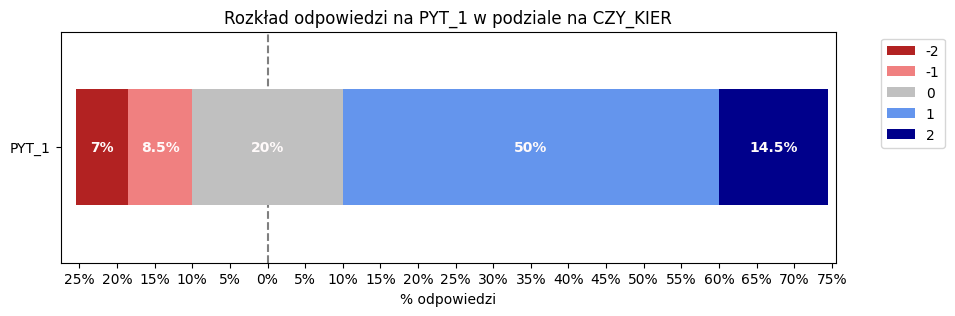

In [31]:
import plot_likert

scale = ['-2', '-1', '0', '1', '2']
ax = plot_likert.plot_likert(df['PYT_1'].astype(str), scale, plot_percentage=True, figsize=(10,3),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title('Rozkład odpowiedzi na PYT_1 w podziale na CZY_KIER')

ax.xaxis.set_label_text('% odpowiedzi')
plt.show()

c:\Users\rafal\AppData\Local\Programs\Python\Python313\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\rafal\AppData\Local\Programs\Python\Python313\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


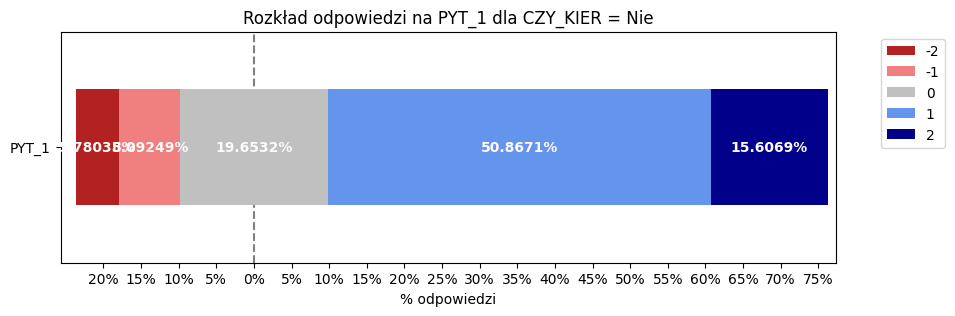

In [32]:
df_czy_kier_tak = df[df['CZY_KIER'] == "Nie"]

ax = plot_likert.plot_likert(df_czy_kier_tak['PYT_1'].astype(str), scale, plot_percentage=True, figsize=(10,3),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title('Rozkład odpowiedzi na PYT_1 dla CZY_KIER = Nie')

ax.xaxis.set_label_text('% odpowiedzi')
plt.show()

c:\Users\rafal\AppData\Local\Programs\Python\Python313\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\rafal\AppData\Local\Programs\Python\Python313\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


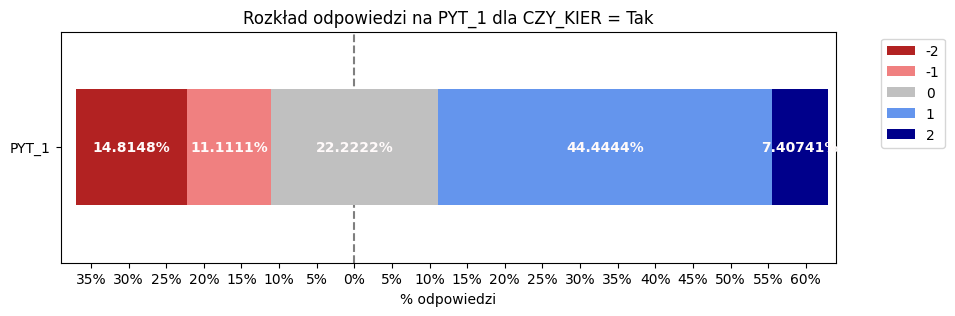

In [33]:
df_czy_kier_tak = df[df['CZY_KIER'] == "Tak"]

ax = plot_likert.plot_likert(df_czy_kier_tak['PYT_1'].astype(str), scale, plot_percentage=True, figsize=(10,3),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title('Rozkład odpowiedzi na PYT_1 dla CZY_KIER = Tak')

ax.xaxis.set_label_text('% odpowiedzi')
plt.show()

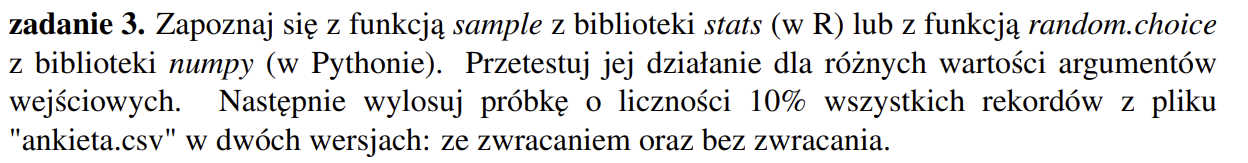

In [34]:
import numpy as np

sample_size = int(len(df) * 0.1)

indices_without_replacement = np.random.choice(df.index, size=sample_size, replace=False)
sample_without_replacement = df.loc[indices_without_replacement]

indices_with_replacement = np.random.choice(df.index, size=sample_size, replace=True)
sample_with_replacement = df.loc[indices_with_replacement]

print(f"Liczba wierszy w oryginalnym zbiorze: {len(df)}. Unikalnych: {len(df.drop_duplicates())}")
print("")
print(f"Liczba wierszy w próbie bez zwracania: {len(sample_without_replacement)}")
print(f"Liczba unikalnych wierszy w próbie bez zwracania: {len(sample_without_replacement.drop_duplicates())}")
print("")
print(f"Liczba wierszy w próbie ze zwracaniem: {len(sample_with_replacement)}")
print(f"Liczba unikalnych wierszy w próbie ze zwracaniem: {len(sample_with_replacement.drop_duplicates())}")

Liczba wierszy w oryginalnym zbiorze: 200. Unikalnych: 188

Liczba wierszy w próbie bez zwracania: 20
Liczba unikalnych wierszy w próbie bez zwracania: 20

Liczba wierszy w próbie ze zwracaniem: 20
Liczba unikalnych wierszy w próbie ze zwracaniem: 19


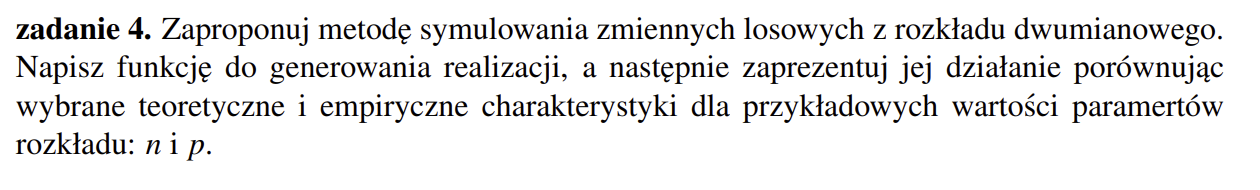

In [35]:
def function_1(n, p):
    random_numbers = np.random.uniform(0, 1, n)
    results = ["0" if x < p else "1" for x in random_numbers]
    count_ones = results.count("1")
    
    return count_ones

n = 100
p = 0.5

function_1(n, p)


50

In [36]:
def function_2(n, p, N):
    # Tworzymy wektor długości N wypełniony zerami
    success_counts = np.zeros(N, dtype=int)
    
    # Wykonujemy function_1 N razy
    for i in range(N):
        success_counts[i] = function_1(n, p)
    
    return success_counts

n = 1000
p = 0.5
N = 40

function_2(n, p, N)

array([515, 473, 535, 487, 490, 528, 498, 480, 482, 497, 492, 506, 500,
       486, 486, 522, 491, 523, 501, 501, 502, 481, 471, 490, 500, 505,
       512, 506, 494, 521, 490, 509, 511, 504, 497, 503, 499, 496, 495,
       529])

In [37]:
W = function_2(n, p, N)
x = sum(W)

E_theoretical = n * p
Var_theoretical = n * p * (1 - p)

E_empirical = np.mean(W)
Var_empirical = np.var(W)

print(f"Teoretyczna wartość oczekiwana (E): {E_theoretical}")
print(f"Empiryczna wartość oczekiwana (E): {E_empirical}")

print(f"Teoretyczna wariancja (Var): {Var_theoretical}")
print(f"Empiryczna wariancja (Var): {Var_empirical}")

Teoretyczna wartość oczekiwana (E): 500.0
Empiryczna wartość oczekiwana (E): 498.9
Teoretyczna wariancja (Var): 250.0
Empiryczna wariancja (Var): 160.58999999999997


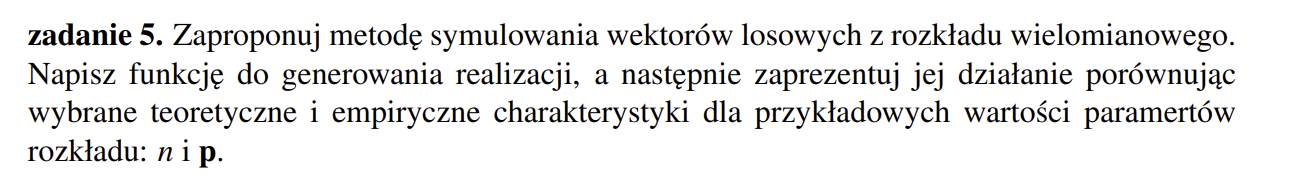

In [38]:
import bisect

In [39]:
def func1(n,ps,x):
    random_numbers = np.random.uniform(0, 1, n)
    cum_prob = np.cumsum(ps)
    result = np.zeros(len(x))
    for num in random_numbers:
        idx = bisect.bisect(cum_prob, num)
        result[idx] += 1
    
    return result

n = 100
p = [0.3,0.3,0.4]
x = [0,1,2]

func1(n, p, x)

array([31., 27., 42.])

In [40]:
def func2(n, p, N, x):
    success_counts = np.zeros((N, len(x))) 

    for i in range(N):
        success_counts[i] = func1(n, p, x)
    
    return success_counts

n = 100
p = [0.3,0.3,0.4]
x = [0,1,2]
N = 1000

func2(n, p, N, x)

array([[24., 31., 45.],
       [36., 22., 42.],
       [25., 38., 37.],
       ...,
       [31., 26., 43.],
       [30., 33., 37.],
       [38., 24., 38.]], shape=(1000, 3))

In [41]:
sample = func2(n,p,N,x)
E_teo_multinom = [n * p_ for p_ in p]
E_emp_multinom = np.mean(sample, axis=0)


In [42]:
print(f"Teoretyczna wartość oczekiwana (E): {E_teo_multinom}")
print(f"Empiryczna wartość oczekiwana (E): {E_emp_multinom}")

Teoretyczna wartość oczekiwana (E): [30.0, 30.0, 40.0]
Empiryczna wartość oczekiwana (E): [30.012 30.173 39.815]


<b>uwaga</b><br>
Nie wolno napisać w sprawku "Wyznaczamy przedział ufności" tylko "wyznaczamy realizację przedziału ufności"

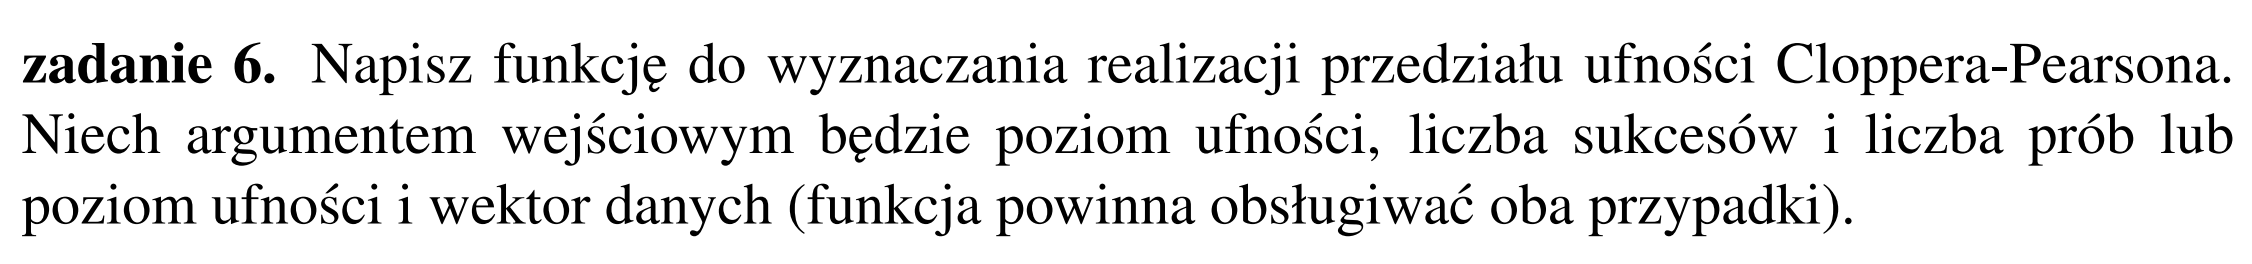

In [43]:
from scipy.stats import beta


def clopper_pearson(alfa, sukces=0, proba=0, dane=[]):
    if (len(dane) > 0):
        sukces = np.sum(dane)
        proba = len(dane)

    lower_bound = beta.ppf(alfa / 2, sukces, proba - sukces + 1)
    upper_bound = beta.ppf(1 - alfa / 2, sukces + 1, proba - sukces)

    return lower_bound, upper_bound

Przykład użycia

In [44]:

alfa = 0.05
sukcesy = 30
proby = 100

przedzial = clopper_pearson(alfa, sukcesy, proby)
przedzial

(np.float64(0.21240642048953656), np.float64(0.39981467617980415))

i poprzez dane

In [45]:
dane_przykladowe = np.random.choice([0, 1], size=100, p=[0.7, 0.3])

przedzial = clopper_pearson(alfa, dane=dane_przykladowe)
przedzial

(np.float64(0.2212887921306712), np.float64(0.41031455416019913))

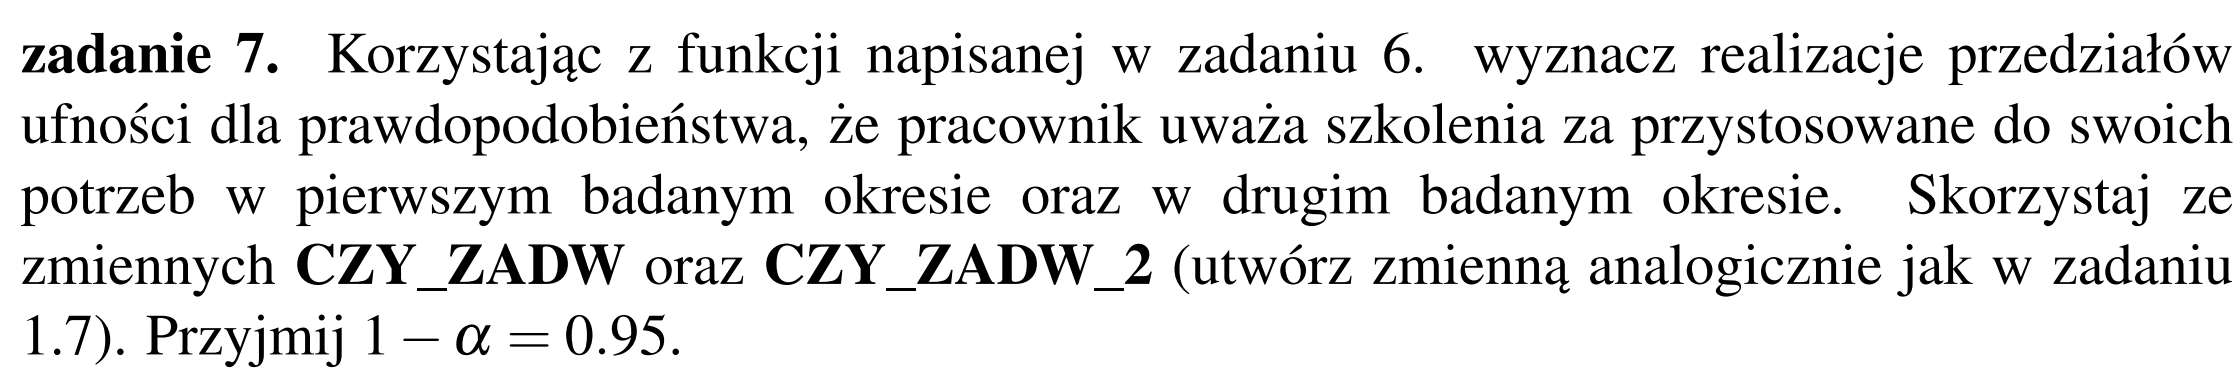

In [46]:
df.loc[df['PYT_2'] <= -1, 'CZY_ZADW'] = 0
df.loc[df['PYT_2'] >= 1, 'CZY_ZADW'] = 1

df.loc[df['PYT_3'] <= -1, 'CZY_ZADW_2'] = 0
df.loc[df['PYT_3'] >= 1, 'CZY_ZADW_2'] = 1

print(df[['PYT_2', 'PYT_3', 'CZY_ZADW', 'CZY_ZADW_2']].head())

   PYT_2  PYT_3  CZY_ZADW  CZY_ZADW_2
0     -2      1       0.0         1.0
1     -2     -2       0.0         0.0
2      2      2       1.0         1.0
3     -2     -2       0.0         0.0
4      2     -1       1.0         0.0


In [47]:
alfa = 0.05  

przedzial_pyt_2 = clopper_pearson(alfa, dane=df["CZY_ZADW"])
przedzial_pyt_3 = clopper_pearson(alfa, dane=df["CZY_ZADW_2"])

In [48]:
przedzial_pyt_2

(np.float64(0.4583305004114749), np.float64(0.6007670588028857))

In [49]:
przedzial_pyt_3

(np.float64(0.5184215852127789), np.float64(0.6588693543285324))

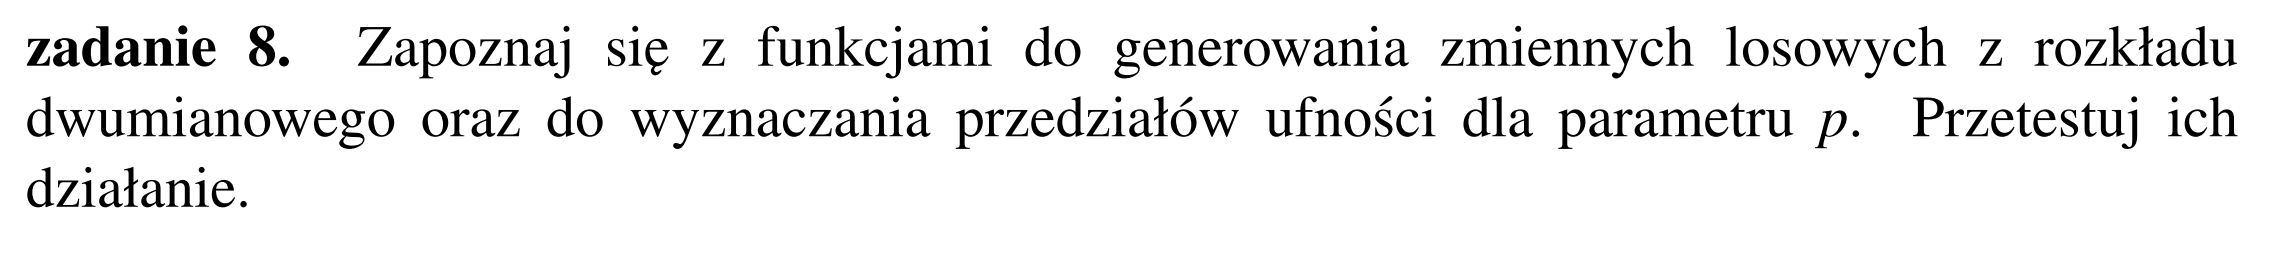

Rozkład dwumianowy $B(n,p)$ modeluje liczbę sukcesów w $n$ niezależnych próbach Bernoulliego, gdzie prawdopodobieństwo sukcesu wynosi $p$.

W Pythonie generujemy wartości z tego rozkładu za pomocą funkcji `np.random.binomial(n, p, size)` z biblioteki NumPy

```python
np.random.binomial(n, p, size=None)
```

Funkcja przyjmuje następujące argumenty:
- $n$: liczba prób (np. liczba rzutów monetą),
- $p$: prawdopodobieństwo sukcesu w jednej próbie,
- $size$: liczba generowanych wartości (np. symulacje).

Przykład realizacji jednej wartości

In [50]:
wynik_1 = np.random.binomial(n=10, p=0.5)
print(f"Wynik pojedynczej symulacji: {wynik_1}")

Wynik pojedynczej symulacji: 7


Przykład dla wielu realizacji; średnia powinna być bliska $EX$, czyli $10 * 0.5 = 5$


In [51]:
wyniki_1000 = np.random.binomial(n=10, p=0.5, size=1000)

print(f"Średnia liczba sukcesów w 1000 eksperymentach: {np.mean(wyniki_1000)}")

Średnia liczba sukcesów w 1000 eksperymentach: 4.932


Przedział ufności dla parametru p rozkładu dwumianowego możemy wyznaczyć za pomocą metody `proportion_confint(k, n, method='binom_test', alpha)` z modułu `statsmodels.stats.propotion`. 

Argumenty:

* $k$ - liczba sukcesów
* $n$ - liczba prób
* $method$ - rozważany rozkład, w naszym przypadku dwumianowy (binom_test)
* $alpha$ - poziom ufności

In [52]:
from statsmodels.stats.proportion import proportion_confint

In [56]:
przedzial_ufnosci = proportion_confint(wynik_1, 10, 0.05,"binom_test")

print(f"Przedział ufności dla próbki z B(10, 0.5) na poziomie ufności α = 0.05:\n I = {przedzial_ufnosci}")

Przedział ufności dla próbki z B(10, 0.5) na poziomie ufności α = 0.05:
 I = (0.3805893402536238, 0.9127355660858542)


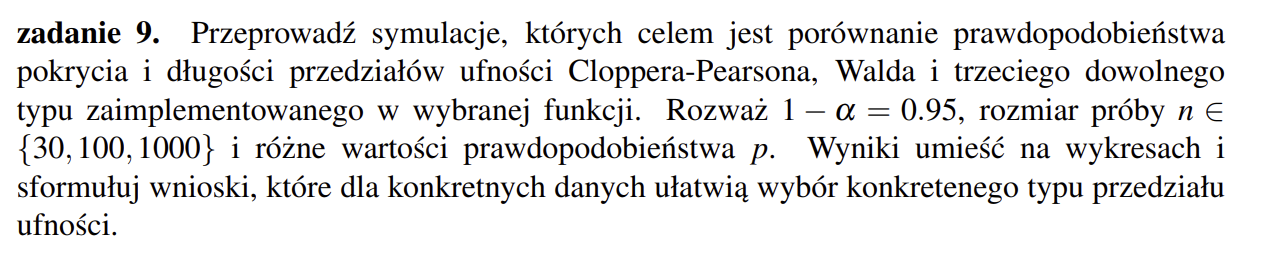

In [59]:
from scipy.stats import norm

In [64]:
ns = [30, 100, 1000]
ps = [0.2, 0.5, 0.8]
alpha  = 0.05
mc = 1000

In [ ]:
def wald(sample, alpha):
    n = len(sample)
    p_estim = np.mean(sample)
    upper_bound = p_estim + norm.ppf(1 - alpha / 2) * np.sqrt(p_estim * (1 - p_estim) / n)
    lower_bound = p_estim - norm.ppf(1 - alpha / 2) * np.sqrt(p_estim * (1 - p_estim) / n)
    return lower_bound, upper_bound

In [ ]:
def wilson(sample, alpha):
    n = len(sample)
    p_estim = np.mean(sample)
    q = norm.ppf(alpha/2)
    center = p_estim + q ** 2 / (2*n) 
    denom = 1 + q ** 2 / N
    margin = q * np.sqrt(p_estim * (1-p_estim) / n + q ** 2 / (4 * n ** 2))
    lower_bound = (center - margin) / denom
    upper_bound = (center + margin) / denom

    return lower_bound, upper_bound

In [ ]:
for n in ns:
    for p in ps:
        sample = np.random.binomial(10, p, n)
        clopper_pearson_ci = clopper_pearson(alpha, dane=sample)
        wald_ci = wald(sample, alpha)
        wilson_ci = wilson(sample, alpha)